## Sentiment Analysis for twitter US airline sentiment

In [5]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import gc
gc.collect()

Using TensorFlow backend.


0

In [6]:
path = '/Users/jumaoyuan/Downloads/Twitter_SA'
tweets=pd.read_csv(os.path.join(path, 'tweets.csv'),sep=',')

In [7]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
data = tweets[['text','airline_sentiment']]

## Data description

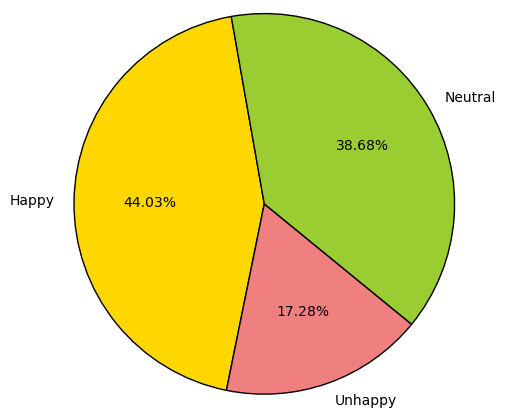

In [5]:
# pie plot for total percentage of Hilary Clinton's emails sentiment
f1=plt.figure(figsize=(5,5))
labels = 'Happy', 'Unhappy', 'Neutral'
sizes = [107, 42, 94]
colors = ['gold', 'lightcoral', 'yellowgreen']
explode = (0, 0, 0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=False, startangle=100)
 
plt.axis('equal')
plt.show()
f1.savefig('piePlot_email.png')

In [ ]:
# pie plot for total percentage of US airline sentiment
f1=plt.figure(figsize=(5,5))
labels = 'Negative', 'Neutral', 'Positive'
sizes = [9178, 3099, 2363]
colors = ['gold', 'lightcoral', 'yellowgreen']
explode = (0, 0, 0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=False, startangle=100)
 
plt.axis('equal')
plt.show()
f1.savefig('piePlot.png')

## LSTM deep learning

In [9]:
def loadNclean():
    data = pd.read_csv(os.path.join(path,'Tweets.csv'))
    data['text'] = data['text'].apply(lambda x: x.lower())
    data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
    return data

max_words = 500
data = loadNclean()
tok = Tokenizer(num_words=max_words, split=' ')
tok.fit_on_texts(data['text'].values)
X = tok.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten

embed_dim = 32
lstm_out = 100
def buildModel(): 
    model = Sequential()
    model.add(Embedding(max_words,embed_dim,input_length=X.shape[1]))
    model.add(LSTM(lstm_out))
    model.add(Dropout(0.05))
    #model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = buildModel()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 32)            16000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 69,503
Trainable params: 69,503
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
#k-fold(k=10) cross validation
from sklearn.model_selection import KFold # import KFold
y = pd.get_dummies(data['airline_sentiment']).values
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     Y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 1464  1465  1466 ... 14637 14638 14639] TEST: [   0    1    2 ... 1461 1462 1463]
TRAIN: [    0     1     2 ... 14637 14638 14639] TEST: [1464 1465 1466 ... 2925 2926 2927]
TRAIN: [    0     1     2 ... 14637 14638 14639] TEST: [2928 2929 2930 ... 4389 4390 4391]
TRAIN: [    0     1     2 ... 14637 14638 14639] TEST: [4392 4393 4394 ... 5853 5854 5855]
TRAIN: [    0     1     2 ... 14637 14638 14639] TEST: [5856 5857 5858 ... 7317 7318 7319]
TRAIN: [    0     1     2 ... 14637 14638 14639] TEST: [7320 7321 7322 ... 8781 8782 8783]
TRAIN: [    0     1     2 ... 14637 14638 14639] TEST: [ 8784  8785  8786 ... 10245 10246 10247]
TRAIN: [    0     1     2 ... 14637 14638 14639] TEST: [10248 10249 10250 ... 11709 11710 11711]
TRAIN: [    0     1     2 ... 14637 14638 14639] TEST: [11712 11713 11714 ... 13173 13174 13175]
TRAIN: [    0     1     2 ... 13173 13174 13175] TEST: [13176 13177 13178 ... 14637 14638 14639]


In [ ]:
#randomly split 70% training and 30% testing
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
Y = pd.get_dummies(data['airline_sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape,Y_train.shape)

In [19]:
model.fit(X_train,Y_train, epochs=2, batch_size=64, verbose=0)

In [21]:
scores = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy is: %.2f" % (scores[1]))

Accuracy is: 0.83


## Naive Bayes

In [32]:
path = '/Users/jumaoyuan/Downloads/Twitter_SA'
data = pd.read_csv(os.path.join(path, 'tweets.csv'),sep=',')
#split data
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['airline_sentiment'], 
                                                    random_state=0)

In [33]:
len(X_train), len(X_test), X_train.shape

(10980, 3660, (10980,))

In [34]:
#http://suruchifialoke.com/2017-06-10-sentiment-analysis-movie/
#naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

# Generate counts from text using a vectorizer  
# We can choose from other available vectorizers, and set many different options
# This code performs our step of computing word counts

#vectorizer = CountVectorizer(stop_words='english', max_df=.05)
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)
len(vect.get_feature_names())
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.fit_transform(X_train)
X_test_vectorized = vect.transform(X_test)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
no_features = 3000
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_features=no_features, stop_words='english')
vect = tfidf_vectorizer.fit(X_train)
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=3000, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [36]:
len(y_train)

10980

In [37]:
X_train_vectorized = vect.fit_transform(X_train)
X_test_vectorized = vect.transform(X_test)
X_train_vectorized

/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


<10980x2345 sparse matrix of type '<class 'numpy.float64'>'
	with 85806 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
nb = MultinomialNB()
nb.fit(X_train_vectorized, [r for r in y_train])
predictions = nb.predict(X_test_vectorized)
predictions
actual = np.array(y_test)
import pandas as pd
y_actu = pd.Series(actual, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)
from sklearn.metrics import accuracy_score
accuracy_score(actual, predictions)

Predicted  negative  neutral  positive
Actual                                
negative       2261       54        12
neutral         514      228        30
positive        281       42       238


0.7450819672131147

## SVM

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['airline_sentiment'], 
                                                    random_state=0)

In [41]:
#https://appliedmachinelearning.wordpress.com/2017/02/12/sentiment-analysis-using-tf-idf-weighting-pythonscikit-learn/
import os
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
model1 = LinearSVC()


#bigram
#vect =  CountVectorizer(stop_words='english', min_df=1, ngram_range=(5,5))
#vect.fit_transform(X_train)

#ti-idf
no_features = 300
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_features=no_features, stop_words='english')
vect = tfidf_vectorizer.fit(X_train)
len(vect.get_feature_names())
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

#model = LogisticRegression()
#model.fit(X_train_vectorized, y_train)

#predictions = model.predict(vect.transform(X_test))

#print('AUC: ', roc_auc_score(y_test, predictions))

model1.fit(X_train_vectorized, y_train)
predictions = model1.predict(vect.transform(X_test))
actual = np.array(y_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(actual, predictions))
import pandas as pd
y_actu = pd.Series(actual, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0.7437158469945355


Predicted,negative,neutral,positive
Actual,,,
negative,2082,178,67
neutral,379,332,61
positive,176,77,308


## tunning parameter: number of epochs 

In [23]:
data.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica what dhepburn said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,virginamerica plus youve added commercials to ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [24]:
data1 = data[['text','airline_sentiment']]

In [25]:
data = data[data.airline_sentiment != "neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
print(data[ data['airline_sentiment'] == 'positive'].size)
print(data[ data['airline_sentiment'] == 'negative'].size)

35445
137670


/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/jumaoyuan/anaconda/envs/APS/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [26]:
max_fatures = 500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [27]:
embed_dim = 128
lstm_out = 196
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 128)           256000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
#k=10-fold cv split k subset datasets
#k-fold(k=10) cross validation
from sklearn.model_selection import KFold # import KFold
y = pd.get_dummies(data['airline_sentiment']).values
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     Y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 1155  1156  1157 ... 11538 11539 11540] TEST: [   0    1    2 ... 1152 1153 1154]
TRAIN: [    0     1     2 ... 11538 11539 11540] TEST: [1155 1156 1157 ... 2306 2307 2308]
TRAIN: [    0     1     2 ... 11538 11539 11540] TEST: [2309 2310 2311 ... 3460 3461 3462]
TRAIN: [    0     1     2 ... 11538 11539 11540] TEST: [3463 3464 3465 ... 4614 4615 4616]
TRAIN: [    0     1     2 ... 11538 11539 11540] TEST: [4617 4618 4619 ... 5768 5769 5770]
TRAIN: [    0     1     2 ... 11538 11539 11540] TEST: [5771 5772 5773 ... 6922 6923 6924]
TRAIN: [    0     1     2 ... 11538 11539 11540] TEST: [6925 6926 6927 ... 8076 8077 8078]
TRAIN: [    0     1     2 ... 11538 11539 11540] TEST: [8079 8080 8081 ... 9230 9231 9232]
TRAIN: [    0     1     2 ... 11538 11539 11540] TEST: [ 9233  9234  9235 ... 10384 10385 10386]
TRAIN: [    0     1     2 ... 10384 10385 10386] TEST: [10387 10388 10389 ... 11538 11539 11540]


In [ ]:
Y = pd.get_dummies(data['airline_sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [29]:
X_val = X_train[:1000]
Y_val = Y_train[:1000]
partial_X_train = X_train[1000:]
partial_Y_train = Y_train[1000:]
batch_size = 256
history = model.fit(partial_X_train, 
                    partial_Y_train, 
                    epochs = 10, 
                    batch_size=batch_size, 
                    validation_data=(X_val, Y_val))

Train on 9887 samples, validate on 500 samples
Epoch 1/10
9887/9887 [==============================] - 37s 4ms/step - loss: 0.5270 - acc: 0.7781 - val_loss: 0.6256 - val_acc: 0.6900
Epoch 2/10
9887/9887 [==============================] - 38s 4ms/step - loss: 0.3721 - acc: 0.8350 - val_loss: 0.4731 - val_acc: 0.7540
Epoch 3/10
9887/9887 [==============================] - 36s 4ms/step - loss: 0.2727 - acc: 0.8848 - val_loss: 0.4003 - val_acc: 0.8380
Epoch 4/10
9887/9887 [==============================] - 31s 3ms/step - loss: 0.2018 - acc: 0.9216 - val_loss: 0.4068 - val_acc: 0.8360
Epoch 5/10
9887/9887 [==============================] - 31s 3ms/step - loss: 0.1682 - acc: 0.9334 - val_loss: 0.3753 - val_acc: 0.8740
Epoch 6/10
9887/9887 [==============================] - 33s 3ms/step - loss: 0.1448 - acc: 0.9416 - val_loss: 0.4101 - val_acc: 0.8540
Epoch 7/10
9887/9887 [==============================] - 40s 4ms/step - loss: 0.1338 - acc: 0.9467 - val_loss: 0.4874 - val_acc: 0.8460
Epoch 8/

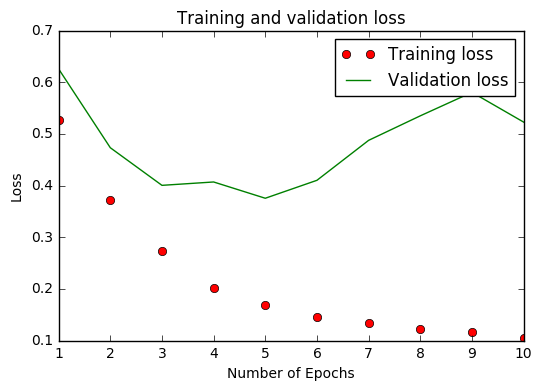

In [30]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
f2=plt.figure(figsize=(6,4))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
f2.savefig('loss.png')

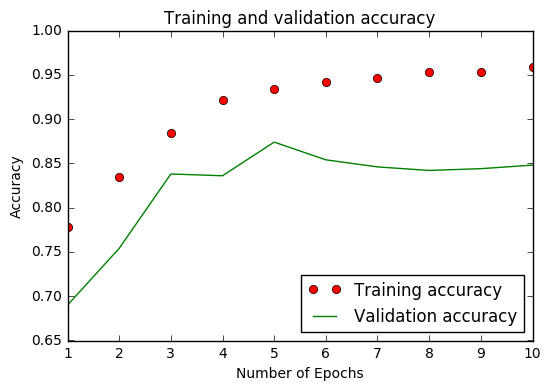

In [31]:
f3=plt.figure(figsize=(6,4))
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
f3.savefig('acc.png')